In [1]:
# Data and math
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Set Seaborn style
sns.set(style="whitegrid", palette="muted")


In [2]:
# Load local CSV (replace path if needed)
data = pd.read_csv("C:\\Users\\SHREYASH\\Downloads\\Advertising And Sales.csv")

# Quick preview
print("Dataset Preview:")
print(data.head())

# Info & Summary
print("\nData Info:")
print(data.info())

print("\nStatistical Summary:")
print(data.describe())


Dataset Preview:
   ID     TV  Radio  Newspaper  Sales
0   1  230.1   37.8       69.2   22.1
1   2   44.5   39.3       45.1   10.4
2   3   17.2   45.9       69.3    9.3
3   4  151.5   41.3       58.5   18.5
4   5  180.8   12.8       58.4   12.9

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None

Statistical Summary:
               ID          TV      Radio   Newspaper     Sales
count  200.000000  200.000000  200.00000  200.000000  200.0000
mean   100.500000  147.032500   23.28950   30.554000   14.0380
std     57.879185   85.885186   14.86997   21.778621    5.2094
min      1.000000    0.700000 

C:\Users\SHREYASH\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


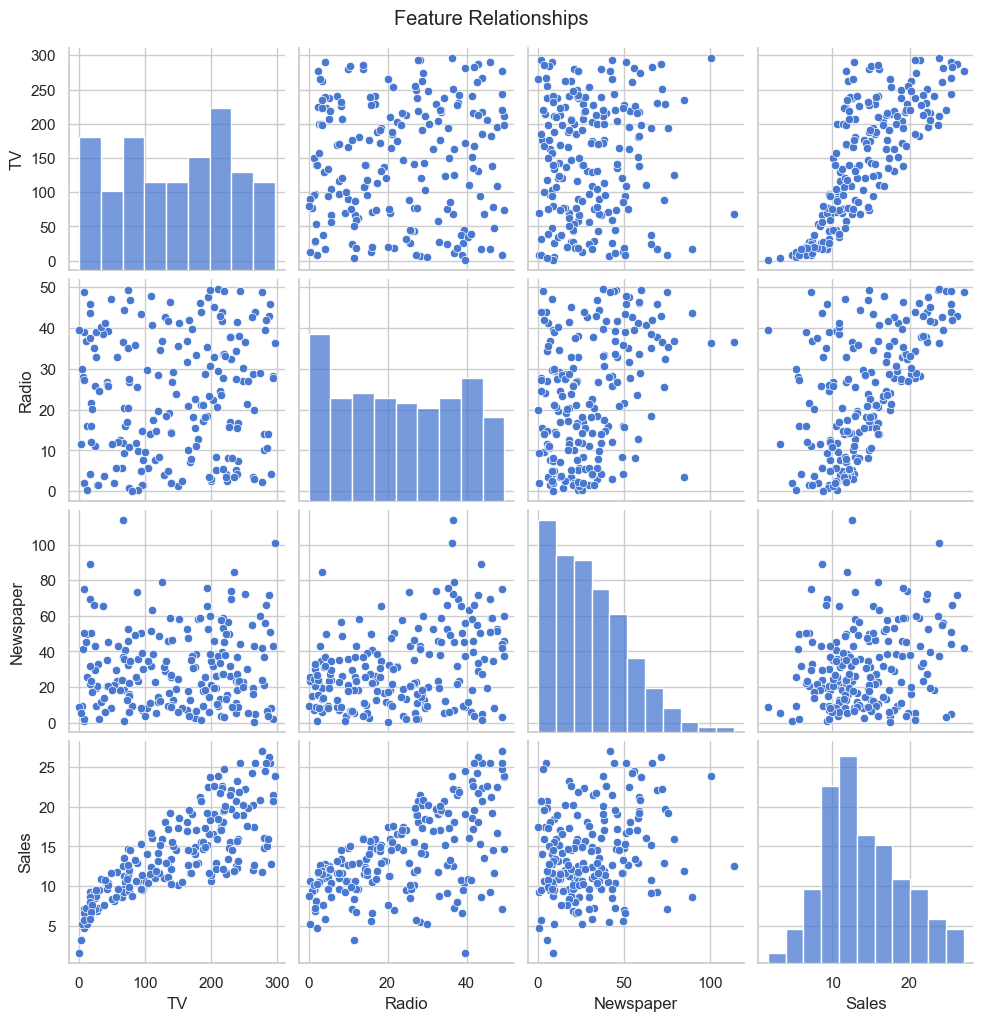

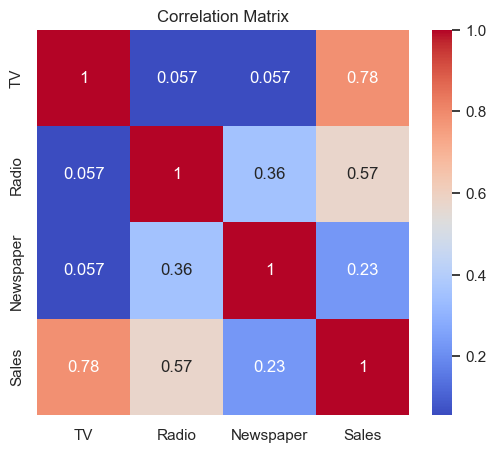

In [3]:
# Pairplot to see relationships between features
sns.pairplot(data[['TV', 'Radio', 'Newspaper', 'Sales']], height=2.5)
plt.suptitle("Feature Relationships", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(data[['TV','Radio','Newspaper','Sales']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [4]:
X = data[['TV']]   # Feature
y = data['Sales']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_linear = lin_reg.predict(X_test)

# R² Score
r2_linear = r2_score(y_test, y_pred_linear)
print(f"Linear Regression R² Score: {r2_linear:.2f}")


Linear Regression R² Score: 0.68


In [6]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)

y_pred_poly = poly_reg.predict(X_poly_test)

# R² Score
r2_poly = r2_score(y_test, y_pred_poly)
print(f"Polynomial Regression R² Score: {r2_poly:.2f}")


Polynomial Regression R² Score: 0.68


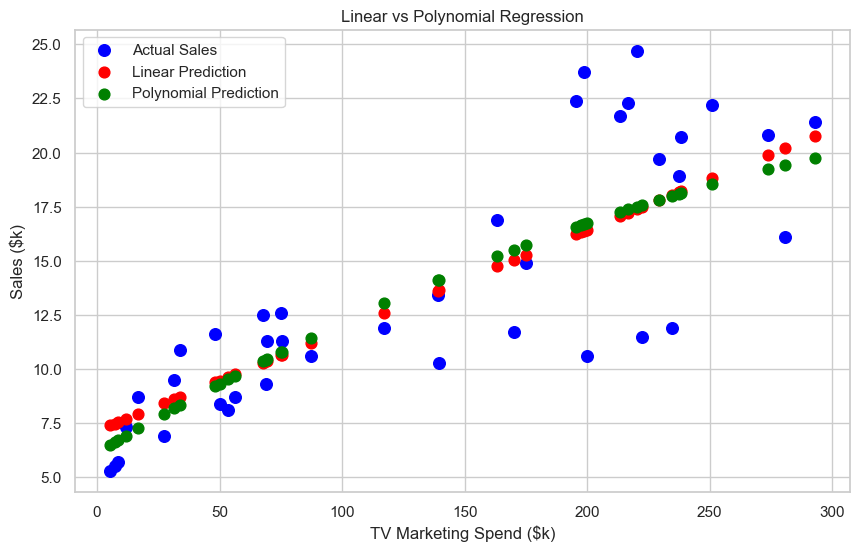

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', s=70, label='Actual Sales')
plt.scatter(X_test, y_pred_linear, color='red', s=60, label='Linear Prediction')
plt.scatter(X_test, y_pred_poly, color='green', s=60, label='Polynomial Prediction')
plt.xlabel('TV Marketing Spend ($k)')
plt.ylabel('Sales ($k)')
plt.title('Linear vs Polynomial Regression')
plt.legend()
plt.show()


In [8]:
X_multi = data[['TV','Radio','Newspaper']]
y_multi = data['Sales']

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

lin_reg_multi = LinearRegression()
lin_reg_multi.fit(X_train_m, y_train_m)

y_pred_multi = lin_reg_multi.predict(X_test_m)
r2_multi = r2_score(y_test_m, y_pred_multi)
print(f"Multi-feature Linear Regression R² Score: {r2_multi:.2f}")


Multi-feature Linear Regression R² Score: 0.90
